# Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



IMPORTING REQUIRED LIBRARY

In [1]:
#data visulaisation and manipulation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#importing the necessary modelling algos 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


#model selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


getting/importing data set

In [2]:
df=pd.read_excel('doctor_Final_Train.xlsx')

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df.shape

(5961, 7)

In [5]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

# EDA

In [7]:
#checking the null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

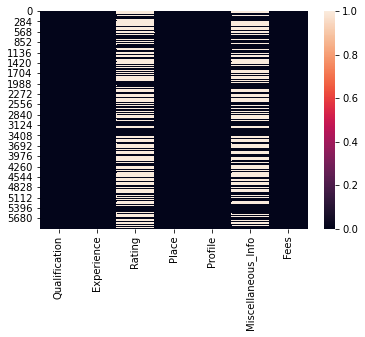

In [8]:
sns.heatmap(df.isnull())

In [9]:
#filling null values
df['Rating'].fillna(value=df['Rating'].mode()[0],inplace=True)
df['Place'].fillna(value=df['Place'].mode()[0],inplace=True)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [10]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [11]:
#dropping miscellaneous_info column
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)
df


,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [12]:
df['Rating'].fillna('0%',inplace=True)

In [13]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [14]:
for i in range(len(df)):
    df['Experience'][i]=df['Experience'][i][:-17]
    
df['Experience']=df['Experience'].astype(int)

In [15]:

df['Rating']=df['Rating']*0.1

In [16]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,10.0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,10.0,"Keelkattalai, Chennai",Ayurveda,250


In [17]:
df.dtypes

Qualification     object
Experience         int32
Rating           float64
Place             object
Profile           object
Fees               int64
dtype: object

In [18]:
#convritng integer type from 32bit to 64 bit
df['Experience']=np.int64(df['Experience'])
df.dtypes

Qualification     object
Experience         int64
Rating           float64
Place             object
Profile           object
Fees               int64
dtype: object

In [19]:

df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,10.0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,10.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,10.0,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,9.7,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15,9.0,"Vileparle West, Mumbai",General Medicine,100


In [20]:
#splitting places into area and city
df['Place'].fillna('missing, missing', inplace = True)
place_split = df['Place'].str.split(', ', expand = True)
df['Area'] = place_split[0]
df['City'] = place_split[1]
df.drop(columns = 'Place', axis =1, inplace = True)

In [21]:
df

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,10.0,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,10.0,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,10.0,Ayurveda,250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,ENT Specialist,300,Basavanagudi,Bangalore
5957,MBBS,33,10.0,General Medicine,100,Nungambakkam,Chennai
5958,MBBS,41,9.7,General Medicine,600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,9.0,General Medicine,100,Vileparle West,Mumbai


In [22]:
df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,9.761064,307.944640
std,11.142798,0.588154,190.920373
min,0.000000,0.700000,5.000000
25%,9.000000,9.800000,150.000000
50%,14.000000,10.000000,300.000000
75%,23.000000,10.000000,500.000000
max,66.000000,10.000000,950.000000


In [23]:
#we can drop area column because of city or area only one can be use 
df.drop(['Area'],axis=1,inplace=True)
df

,Qualification,Experience,Rating,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,10.0,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,10.0,Ayurveda,250,Bangalore
4,BAMS,20,10.0,Ayurveda,250,Chennai
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,ENT Specialist,300,Bangalore
5957,MBBS,33,10.0,General Medicine,100,Chennai
5958,MBBS,41,9.7,General Medicine,600,Delhi
5959,"MBBS, MD - General Medicine",15,9.0,General Medicine,100,Mumbai


In [24]:
df['City'].value_counts()

Bangalore             1283
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Sector 5                 1
Name: City, dtype: int64

In [25]:
df=df[df['City']!='e']
df['City'].value_counts()

Bangalore             1283
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Sector 5                 1
Name: City, dtype: int64

In [26]:
df.shape

(5961, 6)

# DATA VISUALIZATION

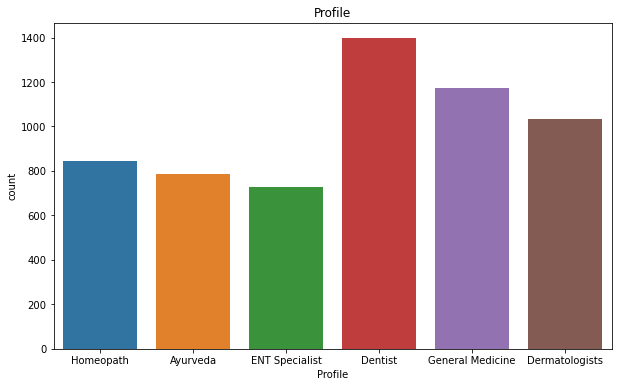

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [27]:
#Univariate analysis
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=df)
plt.title('Profile')
plt.show()
print(df['Profile'].value_counts())

most of the profile of doctors are :- Dentist

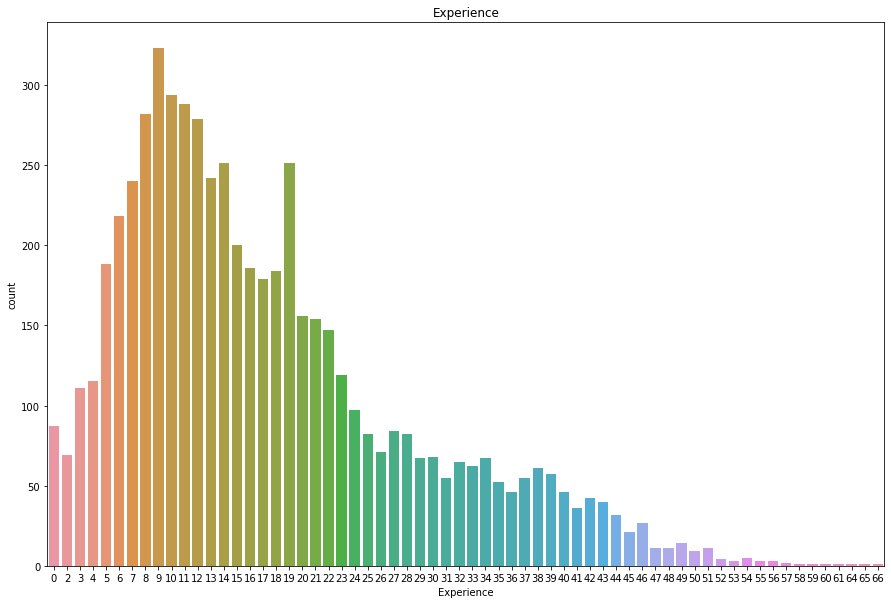

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x='Experience',data=df)
plt.title('Experience')
plt.show()
print(df['Experience'].value_counts())

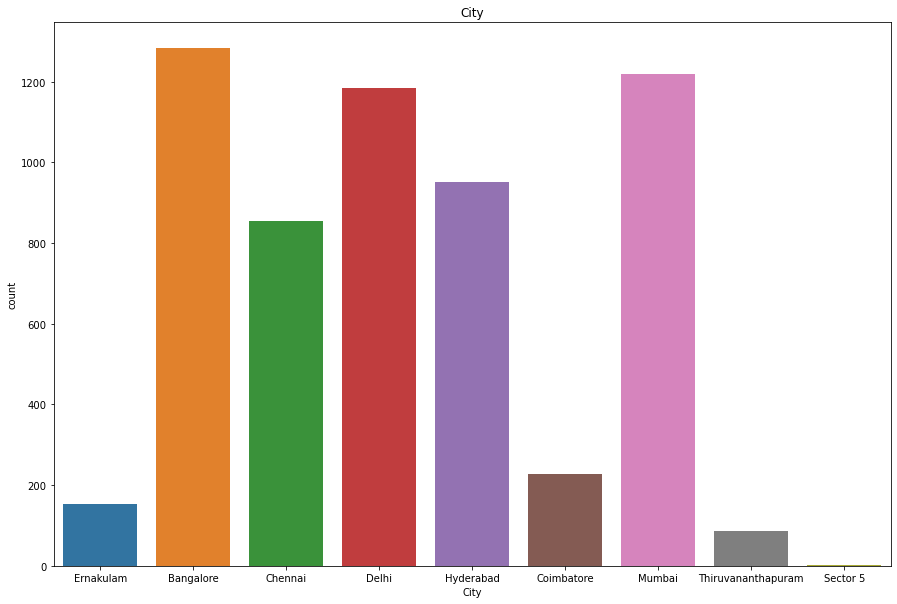

Bangalore             1283
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Sector 5                 1
Name: City, dtype: int64


In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x='City',data=df)
plt.title('City')
plt.show()
print(df['City'].value_counts())

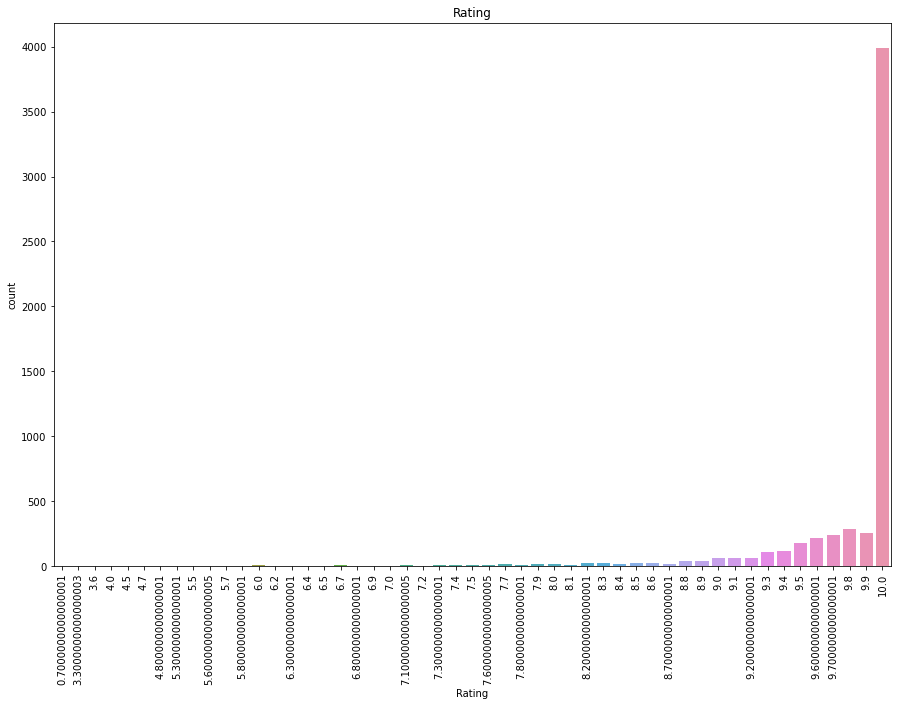

10.0    3986
9.8      290
9.9      259
9.7      241
9.6      220
9.5      178
9.4      115
9.3      109
9.0       66
9.2       66
9.1       60
8.9       42
8.8       41
8.5       27
8.2       23
8.6       21
8.3       21
8.0       19
7.7       16
8.7       14
8.4       13
7.9       13
6.7       12
8.1       12
7.6        9
7.1        9
7.5        8
7.3        8
6.0        7
7.4        7
7.8        6
5.6        5
6.8        5
6.9        4
7.0        4
5.7        3
7.2        3
3.3        2
5.5        2
6.4        2
6.3        2
6.2        2
4.7        1
0.7        1
4.8        1
4.0        1
4.5        1
5.8        1
3.6        1
5.3        1
6.5        1
Name: Rating, dtype: int64


In [30]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Rating',data=df)
plt.title('Rating')
plt.show()
print(df['Rating'].value_counts())

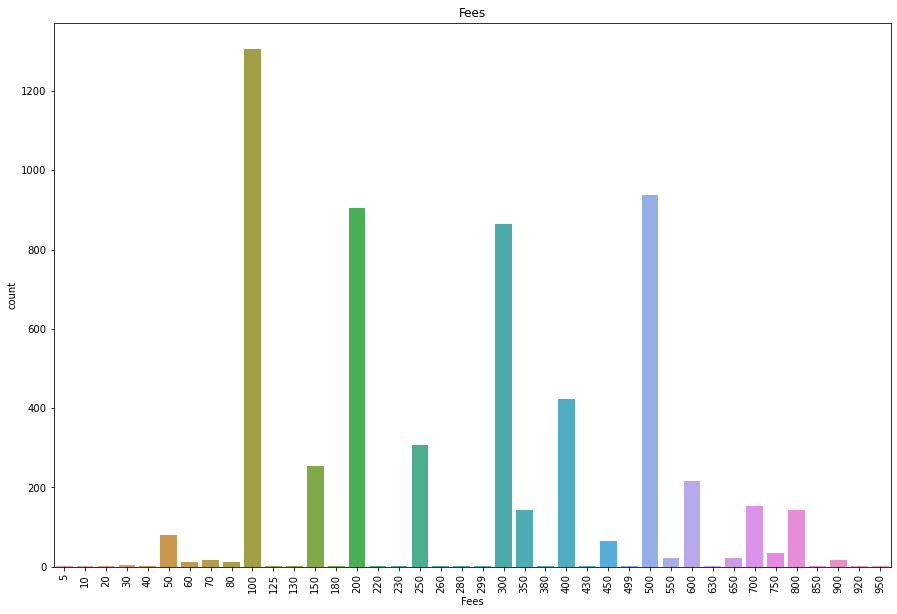

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [31]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Fees',data=df)
plt.title('Fees')
plt.show()
print(df['Fees'].value_counts())

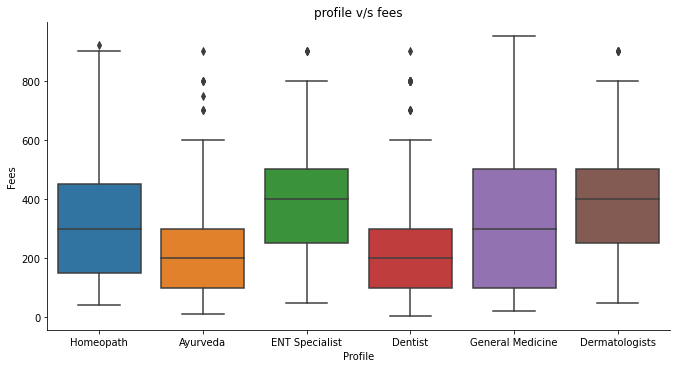

In [32]:
#bivaraite analysis
sns.catplot(x='Profile',y='Fees',data=df,kind='box',height=5,aspect=1.9)
plt.title('profile v/s fees')
plt.show()

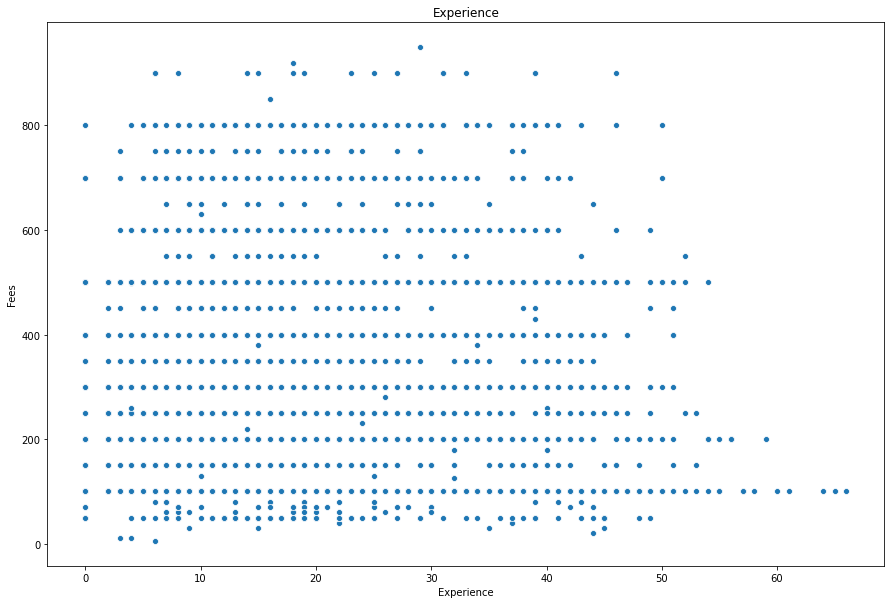

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Experience'],y=df['Fees'],data=df)
plt.title('Experience')
plt.show()

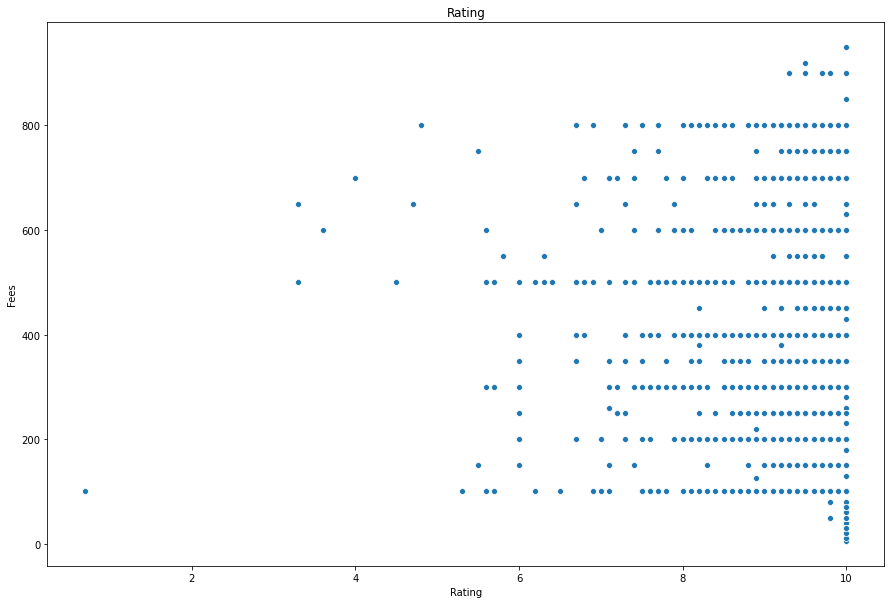

In [34]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Rating'],y=df['Fees'],data=df)
plt.title('Rating')
plt.show()

from above most of the raings lies in 80-100

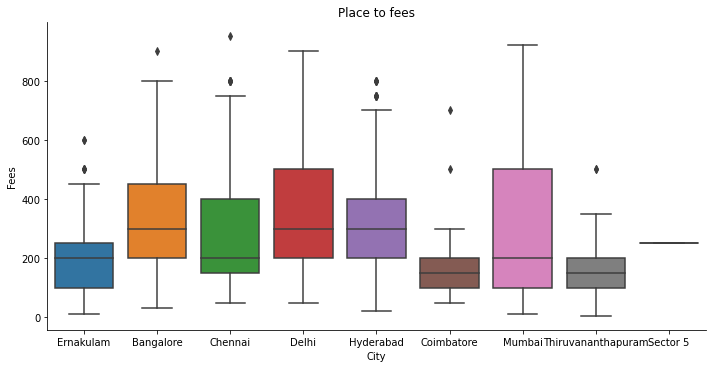

In [35]:
sns.catplot(x='City',y='Fees',data=df,kind="box",height=5,aspect=2.0)
plt.title('Place to fees')
plt.show()

In [36]:
#mutltivariate analysis
df_corr=df.corr()
df_corr

,Experience,Rating,Fees
Experience,1.000000,-0.149594,0.002117
Rating,-0.149594,1.000000,-0.154713
Fees,0.002117,-0.154713,1.000000


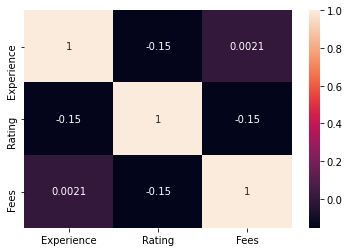

In [37]:
sns.heatmap(df_corr,annot=True)

only profile is correlated with Fees

In [38]:
#Label Encoding the columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
L1=['City','Profile']
for val in L1:
    df[val]=le.fit_transform(df[val].astype(str))

In [39]:
df

,Qualification,Experience,Rating,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,10.0,5,100,4
1,"BAMS, MD - Ayurveda Medicine",12,9.8,0,350,0
2,"MBBS, MS - Otorhinolaryngology",9,10.0,3,300,0
3,"BSc - Zoology, BAMS",12,10.0,0,250,0
4,BAMS,20,10.0,0,250,1
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,3,300,0
5957,MBBS,33,10.0,4,100,1
5958,MBBS,41,9.7,4,600,3
5959,"MBBS, MD - General Medicine",15,9.0,4,100,6


In [40]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

the Qualification column contains so much unique values and there are also lot of specialization is hard to find them 

so lets split the each specialization in Qualification column

In [41]:
df['Qualification']=df['Qualification'].str.split(",")
df['Qualification'].values

array([list(['BHMS', ' MD - Homeopathy']),
       list(['BAMS', ' MD - Ayurveda Medicine']),
       list(['MBBS', ' MS - Otorhinolaryngology']), ..., list(['MBBS']),
       list(['MBBS', ' MD - General Medicine']),
       list(['BDS', ' MDS - Orthodontics'])], dtype=object)

In [42]:
#checking the frequency of each value of Qualification column
Qual={}


for x in df['Qualification'].values:
    for each in x:
        each=each.strip()
        if each in Qual:
            Qual[each]+=1
            
        else:
            Qual[each]=1
            
print(Qual)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [43]:
#top 10 degree used in the Qualification column
most_qual=sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual

[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [44]:
#list the top 10 degrees
final_qual=[]
for q in most_qual:
    final_qual.append(q[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [45]:
#creating dummies of binary columns

for q in final_qual:
    df[q]=0
    
    
    
for x,y in zip(df['Qualification'].values,np.array([i for i in range(len(df))])):
    for c in x:
        c=c.strip()
        if c in final_qual:
            df[c][y]=1

In [46]:
df

,Qualification,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10.0,5,100,4,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,9.8,0,350,0,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,10.0,3,300,0,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,10.0,0,250,0,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10.0,0,250,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"[MBBS, MS - ENT]",19,9.8,3,300,0,1,0,0,0,0,1,0,0,0,0
5957,[MBBS],33,10.0,4,100,1,1,0,0,0,0,0,0,0,0,0
5958,[MBBS],41,9.7,4,600,3,1,0,0,0,0,0,0,0,0,0
5959,"[MBBS, MD - General Medicine]",15,9.0,4,100,6,1,0,0,0,0,0,0,1,0,0


In [47]:
#now we can drop qualification
df.drop(['Qualification'],axis=1,inplace=True)
df

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,5,100,4,0,0,0,1,0,0,0,0,0,1
1,12,9.8,0,350,0,0,0,1,0,0,0,0,0,0,0
2,9,10.0,3,300,0,1,0,0,0,0,0,0,0,0,0
3,12,10.0,0,250,0,0,0,1,0,0,0,0,0,0,0
4,20,10.0,0,250,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,9.8,3,300,0,1,0,0,0,0,1,0,0,0,0
5957,33,10.0,4,100,1,1,0,0,0,0,0,0,0,0,0
5958,41,9.7,4,600,3,1,0,0,0,0,0,0,0,0,0
5959,15,9.0,4,100,6,1,0,0,0,0,0,0,1,0,0


outliers and skewness is no need to be done because most of the columns are categorical and all data are important

# Preparing Input variable

In [48]:
x=df.drop(['Fees'],axis=1)
x

,Experience,Rating,Profile,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,5,4,0,0,0,1,0,0,0,0,0,1
1,12,9.8,0,0,0,0,1,0,0,0,0,0,0,0
2,9,10.0,3,0,1,0,0,0,0,0,0,0,0,0
3,12,10.0,0,0,0,0,1,0,0,0,0,0,0,0
4,20,10.0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,9.8,3,0,1,0,0,0,0,1,0,0,0,0
5957,33,10.0,4,1,1,0,0,0,0,0,0,0,0,0
5958,41,9.7,4,3,1,0,0,0,0,0,0,0,0,0
5959,15,9.0,4,6,1,0,0,0,0,0,0,1,0,0


# Preparing target Varaiable

In [49]:
y=pd.DataFrame(df['Fees'])
y

,Fees
0,100
1,350
2,300
3,250
4,250
...,...
5956,300
5957,100
5958,600
5959,100


In [50]:
#finding the best random state
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred_y=mod.predict(x_test)
    temp_accu=r2_score(y_test,pred_y)
    if temp_accu>accu:
        accu=temp_accu
        best_r_state=i
        
print(f"best random state is :{best_r_state}")

best random state is :89


# Modelling

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=89)
model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),
       GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]


for m in model:
    m.fit(x_train,y_train)
    m_y=m.predict(x_test)
    print("Scoring of model",m,"i",m.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error",mean_absolute_error(y_test,m_y))
    print("Root mean squared error",(mean_squared_error(y_test,m_y))*0.5)
    print("\n\n")


Scoring of model LinearRegression() i 0.10567983503824996

Error
Mean Absolute Error 141.9124827263355
Root mean squared error 15180.316074547587



Scoring of model KNeighborsRegressor() i 0.3214347900940904

Error
Mean Absolute Error 143.61542761319174
Root mean squared error 17170.75910564561



Scoring of model SVR() i 0.0022397807820523363

Error
Mean Absolute Error 151.1983238324012
Root mean squared error 17896.51507108563



Scoring of model RandomForestRegressor() i 0.6754106298650794

Error
Mean Absolute Error 143.35279238990614
Root mean squared error 17521.370561230826



Scoring of model AdaBoostRegressor() i 0.11660178095469698

Error
Mean Absolute Error 145.373294177984
Root mean squared error 15277.205551388195



Scoring of model GradientBoostingRegressor() i 0.23157840697083543

Error
Mean Absolute Error 134.02975845775376
Root mean squared error 14133.272412654243



Scoring of model Lasso() i 0.10029853186584792

Error
Mean Absolute Error 142.73323318620885
Root mea

RandomForestRegressor() has the highest accuracy of 67.48%

# Hyperparameter Tunnig of RandomForestRegressor model using GridSearchCV

In [52]:

from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,400,500]}
reg=GridSearchCV(rfr,parameters)
reg.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [53]:
print(reg.best_params_)

{'n_estimators': 200}


In [54]:
rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
rfr_y=rfr.predict(x_test)
print("score of model is",rfr.score(x_train,y_train))
print("Mean absolute error",mean_absolute_error(y_test,rfr_y))
print("Root Mean Squared Error",(mean_squared_error(y_test,rfr_y))**0.5)

score of model is 0.6781933311373536
Mean absolute error 143.6565615587262
Root Mean Squared Error 187.59827941274116


# Loading Test Data

In [55]:
test_data=pd.read_excel('doctor_Final_Test.xlsx')
df_test=pd.DataFrame(test_data)
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# EDA of Test Data

In [56]:
#checking Null Values
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [57]:
df_test.shape

(1987, 6)

In [58]:
#dropping Miscellaneous_Info column as the information given in the values are already present in other column
df_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [59]:
#filling the null values
df_test['Rating'].fillna(value=df_test['Rating'].mode()[0],inplace=True)
df_test['Place'].fillna(value=df_test['Place'].mode()[0],inplace=True)
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [60]:
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

now,there is no null values is test data 

In [61]:
#converting Experience into numeric
for i in range(len(df_test)):
    df_test['Experience'][i]=df_test['Experience'][i][:-17]
    
df_test['Experience']=df_test['Experience'].astype(int)

In [62]:
#converting Rating into Numeric
for i in range(len(df_test)):
    df_test['Rating'][i]=df_test['Rating'][i][:-1]
    
    
df_test['Rating']=df_test['Rating'].astype(int)

In [63]:
df_test['Rating']=df_test['Rating']*0.1
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40,7.0,"KK Nagar, Chennai",Dermatologists
3,BAMS,0,10.0,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,"Porur, Chennai",General Medicine
1985,BDS,12,9.8,"Arekere, Bangalore",Dentist


In [64]:
df_test.dtypes

Qualification     object
Experience         int32
Rating           float64
Place             object
Profile           object
dtype: object

In [65]:
df_test['Experience']=np.int64(df_test['Experience'])
df_test.dtypes

Qualification     object
Experience         int64
Rating           float64
Place             object
Profile           object
dtype: object

In [66]:
#splitting places into area and city
df_test['Place'].fillna('missing, missing', inplace = True)
place_split = df_test['Place'].str.split(', ', expand = True)
df_test['Area'] = place_split[0]
df_test['City'] = place_split[1]
df_test.drop(columns = 'Place', axis =1, inplace = True)

In [67]:
df_test

,Qualification,Experience,Rating,Profile,Area,City
0,MBBS,35,10.0,General Medicine,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,ENT Specialist,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,7.0,Dermatologists,KK Nagar,Chennai
3,BAMS,0,10.0,Ayurveda,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,Dentist,Kanakpura Road,Bangalore
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,Ayurveda,Basavanagudi,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,Dermatologists,Choolai,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,General Medicine,Porur,Chennai
1985,BDS,12,9.8,Dentist,Arekere,Bangalore


In [68]:
#dropping area from above table 
df_test.drop(['Area'],axis=1,inplace=True)
df_test

,Qualification,Experience,Rating,Profile,City
0,MBBS,35,10.0,General Medicine,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,ENT Specialist,Hyderabad
2,"MBBS, DDVL",40,7.0,Dermatologists,Chennai
3,BAMS,0,10.0,Ayurveda,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,Dentist,Bangalore
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,Ayurveda,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,Dermatologists,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,General Medicine,Chennai
1985,BDS,12,9.8,Dentist,Bangalore


In [69]:
df_test['City'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                395
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: City, dtype: int64

observation:--Test data has highest number of banglore data 

In [70]:
df_test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

most of the doctors profile is general medicine and dentist

In [71]:
df_test['Experience'].unique()

array([35, 31, 40,  0, 16, 14, 23,  9, 11, 44,  4, 34, 13, 28,  6, 32,  3,
        8, 43, 27, 22, 25, 36, 17, 20, 18, 29,  5, 19, 10,  2, 30, 24, 26,
       41, 46, 21, 12, 45, 33, 38,  7, 59, 15, 39, 42, 54, 49, 48, 52, 51,
       50, 37, 47, 53, 56, 65], dtype=int64)

In [72]:
df_test['Rating'].unique()

array([10. ,  7. ,  9. ,  9.4,  9.9,  9.8,  8.7,  6.4,  9.6,  9.5,  9.7,
        9.3,  6.9,  7.1,  8.3,  9.2,  8. ,  8.6,  8.8,  6.7,  8.5,  8.4,
        5.5,  8.9,  8.2,  8.1,  6. ,  7.3,  6.5,  7.7,  9.1,  7.8,  7.9,
        7.6,  5.2,  5.3])

# Label Encoding of Test Data

In [73]:
#encoding City and profile column into unmeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
L1=['City','Profile']
for val in L1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [74]:
df_test

,Qualification,Experience,Rating,Profile,City
0,MBBS,35,10.0,4,6
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,3,5
2,"MBBS, DDVL",40,7.0,2,1
3,BAMS,0,10.0,0,3
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,1,0
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,2,1
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,4,1
1985,BDS,12,9.8,1,0


# Qualification Column Encoding OF test Data

In [75]:
df_test['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [76]:
df_test['Qualification']=df_test['Qualification'].str.split(",")
df_test['Qualification'].values

array([list(['MBBS']),
       list(['MBBS', ' Diploma in Otorhinolaryngology (DLO)']),
       list(['MBBS', ' DDVL']), ...,
       list(['MBBS', ' MD / MS - Obstetrics & Gynaecology']),
       list(['BDS']),
       list(['MBBS', ' MD - Dermatology ', ' Venereology & Leprosy'])],
      dtype=object)

In [77]:
#calculating the frequency of each value of qualification in the dataset
Qual_test={}

for y in df_test['Qualification'].values:
    for each_t in y:
        each_t=each_t.strip()
        if each_t in Qual_test:
            Qual_test[each_t]+=1
        else:
            Qual_test[each_t]=1
            
print(Qual_test)

{'MBBS': 980, 'Diploma in Otorhinolaryngology (DLO)': 85, 'DDVL': 67, 'BAMS': 243, 'BDS': 428, 'MDS - Conservative Dentistry & Endodontics': 34, 'MDS': 21, 'MDS - Pedodontics': 10, 'MD - Ayurveda Medicine': 41, 'Yoga Teachers Training Course': 2, 'M. D. IN KAYACHIKISTA': 2, 'BHMS': 249, 'FCD - Diabetology': 2, 'DDV': 38, 'MD - Dermatology': 196, 'MS - ENT': 128, 'DNB - ENT': 39, 'MNAMS (Membership of the National Academy)': 3, 'Diploma in Naturopathy & Yogic Science (DNYS)': 1, 'Diploma in Diet and Nutrition': 4, 'Diploma in Cosmetology': 5, 'PG Diploma In Clinical Cosmetology (PGDCC)': 4, 'MDS - Periodontics': 13, 'MDS- Oral Pathology': 1, 'MD - General Medicine': 99, 'DNB - Otorhinolaryngology': 15, 'PhD - Endodontics': 1, 'BSc': 3, 'LCEH': 6, 'DGO': 4, 'MD - Obstetrics & Gynaecology': 5, 'MD - Homeopathy': 62, 'DM - Oncology': 1, 'DNB - Dermatology': 5, 'Venereology & Leprosy': 91, 'DVD': 11, 'MS - Otorhinolaryngology': 42, 'Fellowship in Aesthetic Medicine': 5, 'Fellowship in Oral 

In [83]:
most_qual_test=sorted(Qual_test.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual_test

[('MBBS', 980),
 ('BDS', 428),
 ('BHMS', 249),
 ('BAMS', 243),
 ('MD - Dermatology', 196),
 ('MS - ENT', 128),
 ('MD - General Medicine', 99),
 ('Venereology & Leprosy', 91),
 ('Diploma in Otorhinolaryngology (DLO)', 85),
 ('DDVL', 67)]

In [84]:
#listing the top 10 degrees
final_qual_test=[]
for qt in most_qual_test:
    final_qual_test.append(qt[0])
    
print(final_qual_test)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [85]:
#creating dummies of binary columns for those 10top degrees
for qft in final_qual_test:
    df_test[qft]=0
    
for x,y in zip(df_test['Qualification'].values,np.array([i for i in range(len(df_test))])):
    for c in x:
        c=c.strip()
        if c in final_qual_test:
            df_test[c][y]=1

In [86]:
df_test

,Qualification,Experience,Rating,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,[MBBS],35,10.0,4,6,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,10.0,3,5,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40,7.0,2,1,1,0,0,0,0,0,0,0,0,1
3,[BAMS],0,10.0,0,3,0,0,0,1,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,10.0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"[BAMS, Doctor of Medicine]",10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,"[MD - Dermatology , Venereology & Leprosy, M...",4,10.0,2,1,1,0,0,0,1,0,0,1,0,0
1984,"[MBBS, MD / MS - Obstetrics & Gynaecology]",9,10.0,4,1,1,0,0,0,0,0,0,0,0,0
1985,[BDS],12,9.8,1,0,0,1,0,0,0,0,0,0,0,0


In [87]:
df_test.drop(['Qualification'],axis=1,inplace=True)
df_test

,Experience,Rating,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,10.0,4,6,1,0,0,0,0,0,0,0,0,0
1,31,10.0,3,5,1,0,0,0,0,0,0,0,1,0
2,40,7.0,2,1,1,0,0,0,0,0,0,0,0,1
3,0,10.0,0,3,0,0,0,1,0,0,0,0,0,0
4,16,10.0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,4,10.0,2,1,1,0,0,0,1,0,0,1,0,0
1984,9,10.0,4,1,1,0,0,0,0,0,0,0,0,0
1985,12,9.8,1,0,0,1,0,0,0,0,0,0,0,0


# Prediction using best model RandomForestRegressor

In [88]:
#rfr is the object for RandomForestRegressor
rfr_pred=rfr.predict(df_test)
rfr_pred

array([212.92142857, 384.675     , 423.5       , ..., 164.75059524,
       250.8547619 , 329.29285714])

In [89]:
rfr_pred=pd.DataFrame(rfr_pred,columns=['Fees'])
rfr_pred

,Fees
0,212.921429
1,384.675000
2,423.500000
3,180.016964
4,299.656169
...,...
1982,267.238095
1983,298.920833
1984,164.750595
1985,250.854762


# Saving Predicted Values into CSV file

In [90]:
rfr_pred.to_csv('rfr.csv')

# Saving the model

In [91]:
import pickle
filename='Doctor_consulation_fee_rfr.pkl'
pickle.dump(rfr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(df_test)

array([212.92142857, 384.675     , 423.5       , ..., 164.75059524,
       250.8547619 , 329.29285714])